**Objective:** To categorise the countries using socio-economic and health factors that determine the overall development of the country.


---



---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import plotly.express as exp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Country_data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
labels = pd.read_csv('data_dic.csv')
labels.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [4]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


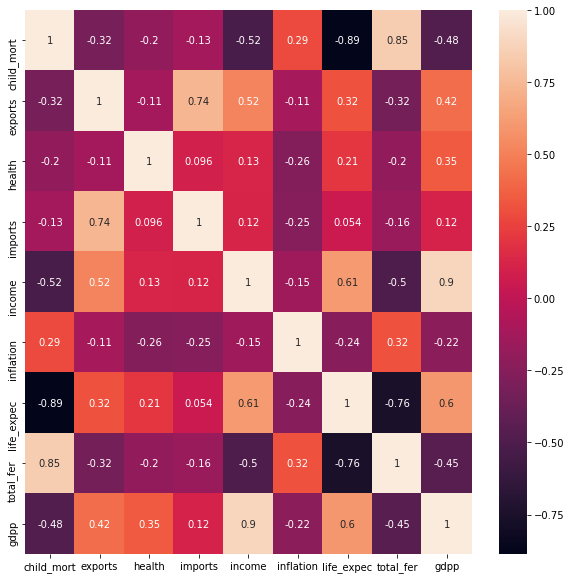

In [5]:
fig = plt.figure(figsize=(10,10))
ax = sb.heatmap(df.corr(), annot=True)
plt.show()

In [6]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop('country', axis=1))

In [7]:
scaled_df = pd.DataFrame(data=scaled_data, columns=df.columns[1:])
scaled_df['country'] = df['country']
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,Afghanistan
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,Albania
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,Algeria
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,Angola
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,Antigua and Barbuda


In [8]:
exp.histogram(data_frame=df, x='gdpp',nbins=167, opacity=0.75, barmode='overlay')

In [9]:
exp.scatter(data_frame=df, x='child_mort', y='health', color='country')

In [10]:
data = scaled_df.drop('country', axis=1)

In [11]:
ssd = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(data)
  ssd.append(kmeans.inertia_)

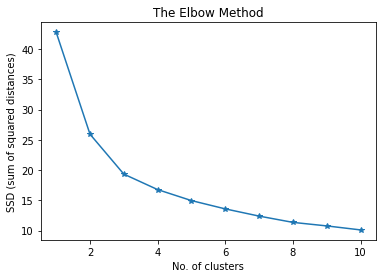

In [12]:
plt.plot(range(1,11), ssd, '*-')
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('SSD (sum of squared distances)')
plt.show()

In [13]:
kmeans= KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans.fit(data)
pred = kmeans.labels_

In [14]:
exp.scatter(data_frame= df,x = 'gdpp', y='income', color=kmeans.labels_)

In [15]:
pca = PCA(n_components=2)
pca_model = pca.fit_transform(data)
data_transform = pd.DataFrame(data = pca_model, columns = ['PCA1', 'PCA2'])
data_transform['Cluster'] = pred

In [16]:
data_transform.head()

,PCA1,PCA2,Cluster
0,-0.599078,0.095490,1
1,0.158474,-0.212092,0
2,0.003686,-0.135867,0
3,-0.650235,0.275975,1
4,0.200711,-0.064662,0


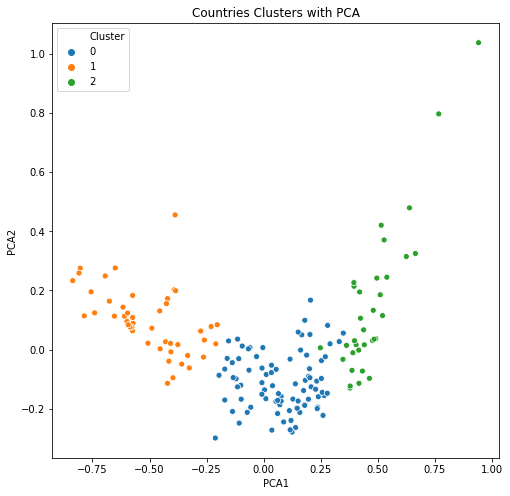

In [17]:
plt.figure(figsize=(8,8))
g = sb.scatterplot(data=data_transform, x='PCA1', y='PCA2', palette=sb.color_palette(n_colors=3), hue='Cluster')
title = plt.title('Countries Clusters with PCA')